# Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Import the dataset
df = pd.read_csv('Dataset.csv.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
# Importing regular expression module

import re

In [5]:
# Define a function to clean text.

def remove_non_printable(text):
    if isinstance(text, str):
        return re.sub(r'[^\x20-\x7E]', '', text)
    return text

In [6]:
# Applying the function to all columns.

df_cleaned = df.applymap(remove_non_printable)

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\484291438.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(remove_non_printable)


In [7]:
# Checking the cleaned data

df_cleaned

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
# Assigning the cleaned data back to df

df = df_cleaned
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Exploratory Data Analysis

In [10]:
# View the columns in the dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
# View number of unique values

print('The unique values in the country code:', df['Country Code'].nunique())
print('The unique values in the Price Range:', df['Price range'].nunique())
print('The unique values in City:',df['City'].nunique())
print('The unique values in Locality:',df['Locality'].nunique())
print('The unique values in Restaurant:',df['Restaurant ID'].nunique())
print('The unique values in Cuisines:',df['Cuisines'].nunique())

The unique values in the country code: 15
The unique values in the Price Range: 4
The unique values in City: 141
The unique values in Locality: 1208
The unique values in Restaurant: 9551
The unique values in Cuisines: 1825


In [12]:
# View Series containing counts of unique values.

print('Series counts of unique values:\n',df['Switch to order menu'].value_counts())
print('Series counts of unique values:\n',df['Country Code'].value_counts())
print('Series counts of unique values:\n',df['Price range'].value_counts())

Series counts of unique values:
 Switch to order menu
No    9551
Name: count, dtype: int64
Series counts of unique values:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
Series counts of unique values:
 Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [13]:
# Analyze Descriptive Stastistics of Categorical columns

df.describe(include='O')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [14]:
# Analyze Descripive Statistics of Numerical columns

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
# View the information of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
# Checking duplicates

print('The duplicates present in the dataset:',df.duplicated().sum())

The duplicates present in the dataset: 0


## Handling Missing Values

In [18]:
# Checking the null values

print('The null valus present in the dataset:',df.isnull().sum())

The null valus present in the dataset: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [19]:
# Dropping the rows of null values in Cuisines

df = df.dropna(subset = ['Cuisines'])

In [20]:
# Checking null values after dropping null.

print('After removing the null values:',df.isnull().sum())

After removing the null values: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [21]:
# Analyze the Rating text, Rating color and Aggregare rating

df[['Rating text','Rating color','Aggregate rating']].head(100)

,Rating text,Rating color,Aggregate rating
0,Excellent,Dark Green,4.8
1,Excellent,Dark Green,4.5
2,Very Good,Green,4.4
3,Excellent,Dark Green,4.9
4,Excellent,Dark Green,4.8
...,...,...,...
98,Good,Yellow,3.5
99,Good,Yellow,3.8
100,Good,Yellow,3.7
101,Average,Orange,3.4


In [22]:
# View the rating text and their aggregare rating

df.groupby('Rating text')['Aggregate rating'].mean()

Rating text
Average      3.051339
Excellent    4.659667
Good         3.683063
Not rated    0.000000
Poor         2.297849
Very Good    4.167904
Name: Aggregate rating, dtype: float64

# Data Preprocessing

## Dropping irrelevant features

- Rating text and Rating color are directly derived from Aggregate rating(target variable). If these columns stay in model,
  its like feeding the back into the input.
- RestaurantID is unique in 9551 rows.So Restaurant Name, Address, Locality Verbose doesn't have
  impact on predicting model. Also leads to overfitting.
- Dataset already have Country Code, so no need for Currency.
- Switch to order menu also has only 1 unique value,meaning it cannot help the model distinguish between different ratings.

In [26]:
irrelavent_columns = ['Switch to order menu','Restaurant ID','Restaurant Name','Address','Locality Verbose','Currency','Rating text','Rating color']
df.drop(columns=irrelavent_columns,axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\3531883980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=irrelavent_columns,axis=1,inplace=True)


In [27]:
print('The Columns after removing irrelevant columns:\n',df.columns)

The Columns after removing irrelevant columns:
 Index(['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [28]:
df['Cuisines'] = df['Cuisines'].apply(lambda x:x.split(',')[0].strip())

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\1287604170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisines'] = df['Cuisines'].apply(lambda x:x.split(',')[0].strip())


In [29]:
print('The unique values after taking primary cuisine as main cuisine:',df['Cuisines'].nunique())

The unique values after taking primary cuisine as main cuisine: 119


In [30]:
df.shape

(9542, 13)

# Data Visualization

## 1. Most Ordered Cuisines

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\1485012239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values,y = top_cuisines.index,palette = 'magma')


Text(0.5, 1.0, 'Top 10 Most Ordered Cuisines')

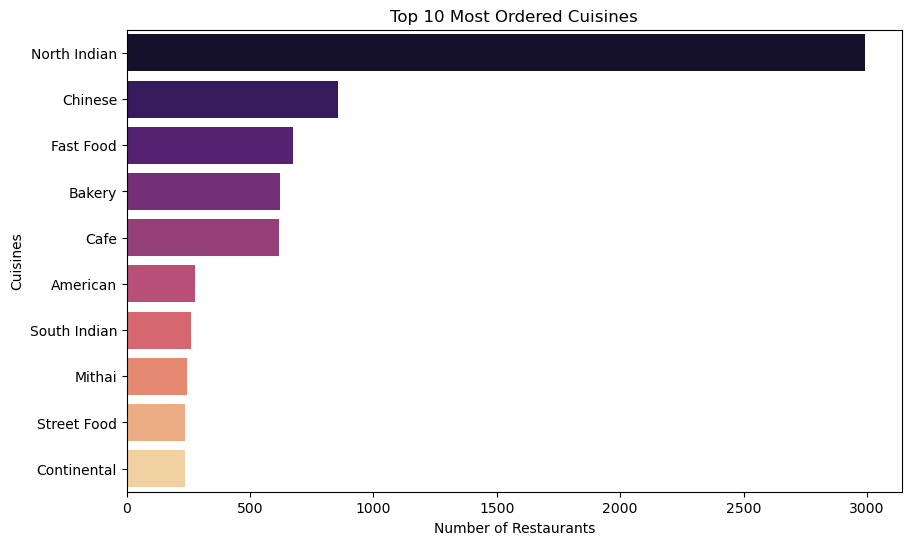

In [33]:
top_cuisines = df['Cuisines'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values,y = top_cuisines.index,palette = 'magma')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.title('Top 10 Most Ordered Cuisines')

## 2. Top 10 localities with Most Restaurants

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\781745406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_localities.values,y = top_localities.index,palette='viridis')


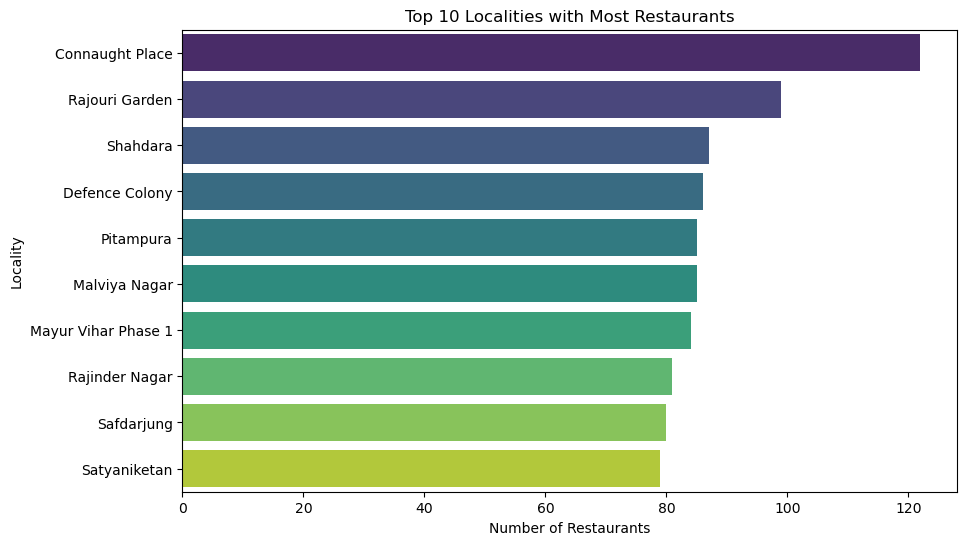

In [35]:
top_localities = df['Locality'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x= top_localities.values,y = top_localities.index,palette='viridis')
plt.title('Top 10 Localities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')
plt.show()

## 3. Top 10 best rated cuisines

In [37]:
top_cuisines_rating = (df[['Cuisines','Aggregate rating']].groupby('Cuisines').mean()
                       .sort_values(by='Aggregate rating',ascending= False).head(10))

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\888114024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_rating['Aggregate rating'],y=top_cuisines_rating.index,palette='Spectral')


(0.0, 5.0)

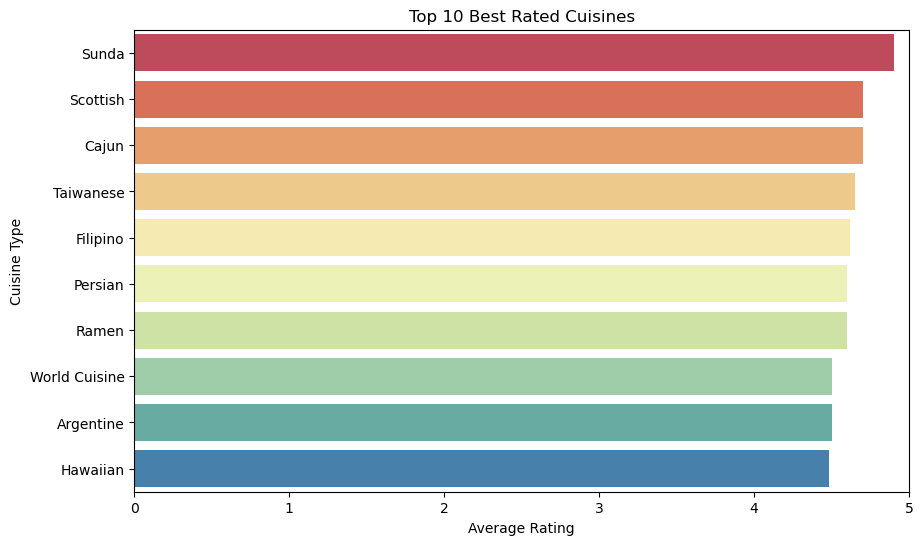

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines_rating['Aggregate rating'],y=top_cuisines_rating.index,palette='Spectral')
plt.title('Top 10 Best Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.xlim(0, 5) 

## 4. Average Rating by Price Range

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\1628405227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price range', y='Aggregate rating', data=price_rating, palette='coolwarm')


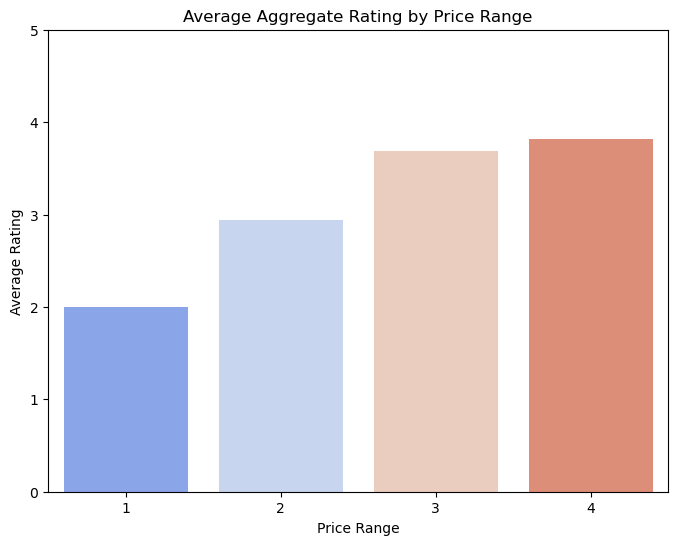

In [40]:
price_rating = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Price range', y='Aggregate rating', data=price_rating, palette='coolwarm')
plt.title('Average Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()

## 5. Restaurant counts by Country Code

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\3678829686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


Text(0, 0.5, 'Number of Restaurants')

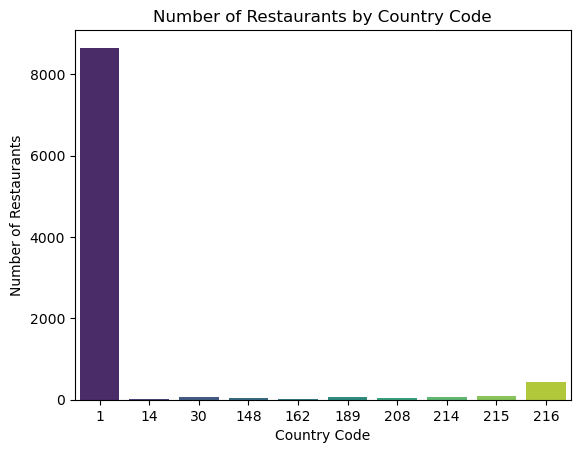

In [42]:
country_counts = df['Country Code'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Number of Restaurants by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')


## Distribution of Target Column

<Axes: xlabel='Aggregate rating', ylabel='Count'>

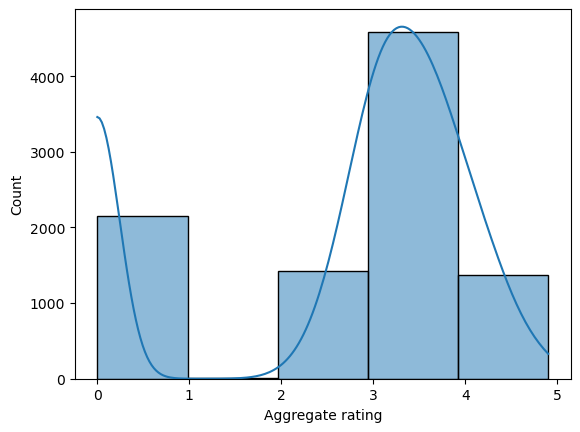

In [44]:
# Visualize the distribution of target column.

sns.histplot(data=df,x='Aggregate rating',kde=True,bins=5)

In [45]:
print('The Skewness of Aggregate rating is :',df['Aggregate rating'].skew())
print('The Kurtosis of Aggregte rating is:',df['Aggregate rating'].kurtosis())

The Skewness of Aggregate rating is : -0.9530521389484676
The Kurtosis of Aggregte rating is: -0.5848316511235394


In [46]:
print('The Skewness of Votes:',df['Votes'].skew())
print('The Kurtosis of Votes:',df['Votes'].kurtosis())

The Skewness of Votes: 8.813270097203294
The Kurtosis of Votes: 128.3160222421203


In [47]:
print('The Skewness of Average Cost for two:',df[ 'Average Cost for two'].skew())
print('The Kurtosis of Average Cost for two:',df[ 'Average Cost for two'].kurtosis())

The Skewness of Average Cost for two: 35.4612635279866
The Kurtosis of Average Cost for two: 1494.3712091121422


## Detecting Outliers using Box plot

Text(0.5, 1.0, 'Boxplot of Aggregate Rating')

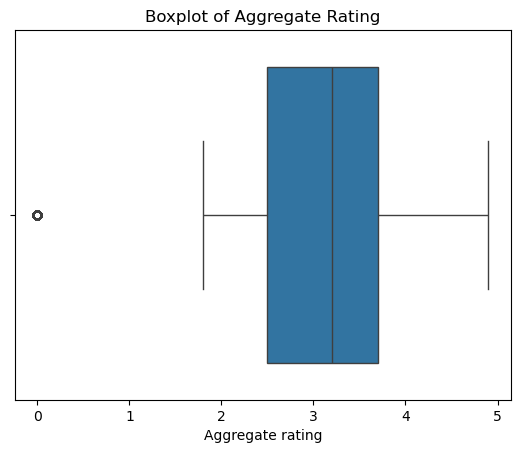

In [49]:

sns.boxplot(data=df,x='Aggregate rating')
plt.title('Boxplot of Aggregate Rating')

Text(0.5, 1.0, 'Boxplot of Votes')

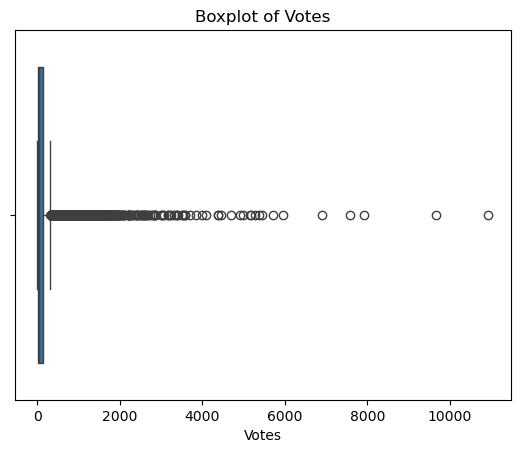

In [50]:

sns.boxplot(data=df,x='Votes')
plt.title('Boxplot of Votes')

Text(0.5, 1.0, 'Boxplot of Average Cost for two')

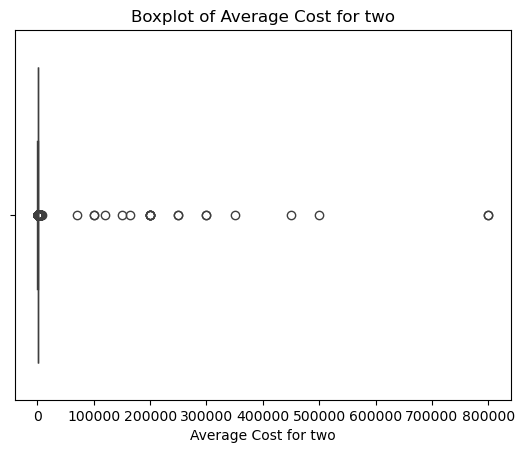

In [51]:
sns.boxplot(data=df,x='Average Cost for two')
plt.title('Boxplot of Average Cost for two')

## IQR for removing Outliers

In [53]:
outlier_columns = ['Votes', 'Average Cost for two','Aggregate rating']

for col in outlier_columns:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)

    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

C:\Users\HP\AppData\Local\Temp\ipykernel_2440\2167657156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\HP\AppData\Local\Temp\ipykernel_2440\2167657156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\HP\AppData\Local\Temp\ipykernel_2440\2167657156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Boxplot after removing Outliers

Text(0.5, 1.0, 'Boxplot for Aggregare Rating')

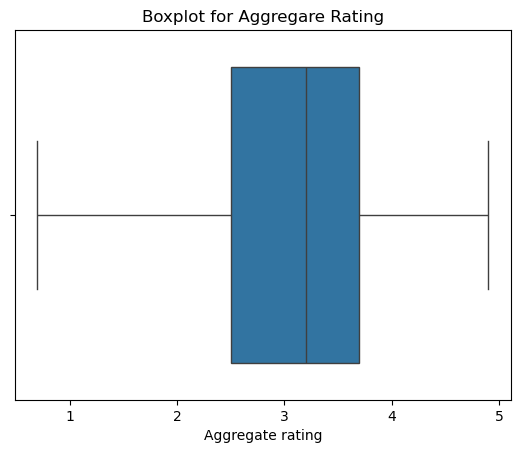

In [55]:
sns.boxplot(data=df,x='Aggregate rating')
plt.title('Boxplot for Aggregare Rating')

Text(0.5, 1.0, 'Boxplot of Votes')

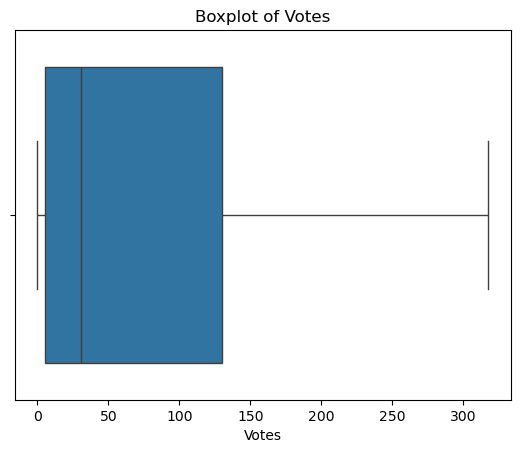

In [56]:
sns.boxplot(data=df,x='Votes')
plt.title('Boxplot of Votes')

Text(0.5, 1.0, 'Boxplot of Average Cost for two')

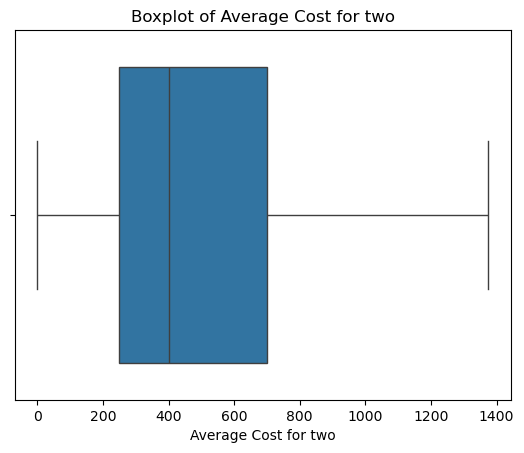

In [57]:
sns.boxplot(data=df,x='Average Cost for two')
plt.title('Boxplot of Average Cost for two')

## Skewness and Kurtosis after removing Outliers

In [59]:
print('The Skewness of Aggregate rating:',df['Aggregate rating'].skew())
print('The kurtosis of Aggregare rating:',df['Aggregate rating'].kurtosis())
print('The Skewness of Average Cost for two:',df[ 'Average Cost for two'].skew())
print('The Kurtosis of Average Cost for two:',df[ 'Average Cost for two'].kurtosis())
print('The Skewness of Votes:',df['Votes'].skew())
print('The Kurtosis of Votes:',df['Votes'].kurtosis())
      

The Skewness of Aggregate rating: -0.7833330074511717
The kurtosis of Aggregare rating: -0.7013154017866663
The Skewness of Average Cost for two: 0.9846753353525619
The Kurtosis of Average Cost for two: 0.1276826922105383
The Skewness of Votes: 1.2223670957973158
The Kurtosis of Votes: 0.016757626238335543


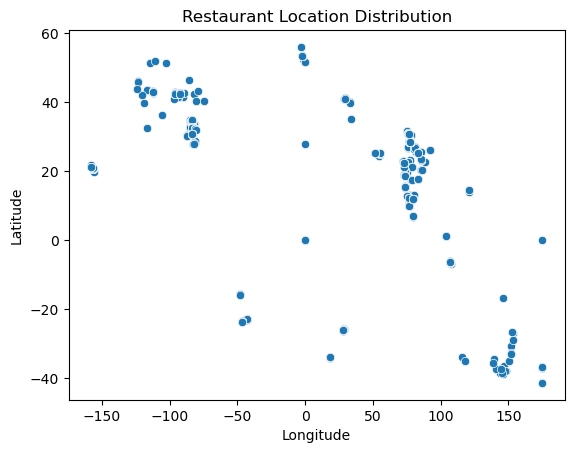

In [60]:
# Visualizing the Distribution of  Restaurant Locations.

sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Restaurant Location Distribution')
plt.show()


## Correlation Heatmap

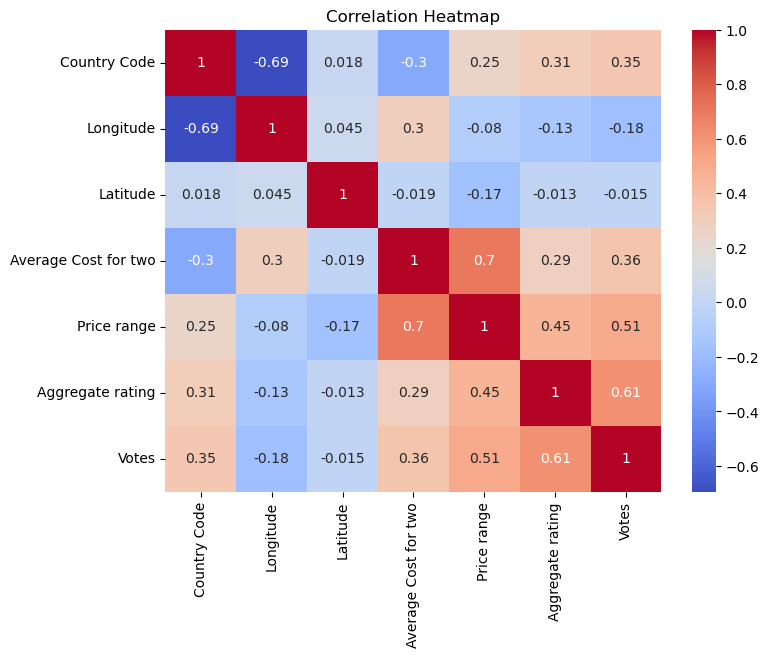

In [62]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Splitting into Categorical column and Numerical Column

In [64]:
numerical_columns = df.select_dtypes(include='number').drop(columns='Aggregate rating').columns.tolist()

In [65]:
numerical_columns

['Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Votes']

In [67]:
le = LabelEncoder()
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])



C:\Users\HP\AppData\Local\Temp\ipykernel_2440\3960270437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
C:\Users\HP\AppData\Local\Temp\ipykernel_2440\3960270437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
C:\Users\HP\AppData\Local\Temp\ipykernel_2440\3960270437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [68]:
df

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,French,1100,1,0,0,3,4.8,314.0
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,1,0,0,3,4.5,317.5
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,Seafood,1375,1,0,0,4,4.4,270.0
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,Japanese,1375,0,0,0,4,4.9,317.5
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,Japanese,1375,1,0,0,4,4.8,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,stanbul,Karak_y,28.977392,41.022793,Turkish,80,0,0,0,3,4.1,317.5
9547,208,stanbul,Kouyolu,29.041297,41.009847,World Cuisine,105,0,0,0,3,4.2,317.5
9548,208,stanbul,Kuru_eme,29.034640,41.055817,Italian,170,0,0,0,4,3.7,317.5
9549,208,stanbul,Kuru_eme,29.036019,41.057979,Restaurant Cafe,120,0,0,0,4,4.0,317.5


In [69]:
# Select columns for one-hot encoding
cols_to_encode = ['City','Cuisines']

# Create OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False)

# Fit and transform
encoded_array = ohe.fit_transform(df[cols_to_encode])

# Create a DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(cols_to_encode))

# Reset index to align properly with orginal Dataframe
encoded_df.index = df.index

# Drop original columns and concatenate the new one-hot encoded columns
df = df.drop(cols_to_encode,axis=1)
df = pd.concat([df,encoded_df],axis=1)

In [70]:
df.head()

,Country Code,Locality,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,...,Cuisines_Tapas,Cuisines_Tea,Cuisines_Tex-Mex,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Turkish,Cuisines_Turkish Pizza,Cuisines_Vietnamese,Cuisines_Western,Cuisines_World Cuisine
0,162,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,1100,1,0,0,3,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,162,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,1200,1,0,0,3,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,1375,1,0,0,4,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,1375,0,0,0,4,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,1375,1,0,0,4,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df.columns

Index(['Country Code', 'Locality', 'Longitude', 'Latitude',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating',
       ...
       'Cuisines_Tapas', 'Cuisines_Tea', 'Cuisines_Tex-Mex', 'Cuisines_Thai',
       'Cuisines_Tibetan', 'Cuisines_Turkish', 'Cuisines_Turkish Pizza',
       'Cuisines_Vietnamese', 'Cuisines_Western', 'Cuisines_World Cuisine'],
      dtype='object', length=268)

In [72]:
X = df.drop(columns=['Aggregate rating','Locality','Latitude','Longitude'],axis=1)
y = df['Aggregate rating']

In [73]:
X.shape

(9542, 264)

In [74]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

## Feature Selection

In [76]:
mi_scores = mutual_info_regression(X,y,discrete_features=True,random_state=0)

In [77]:
# Significant features in descending order.

mi_result = pd.DataFrame({'Features':X.columns,
                          'Mi Scores':mi_scores}).sort_values(by='Mi Scores',ascending=False)
mi_result

,Features,Mi Scores
6,Votes,0.867690
1,Average Cost for two,0.233953
5,Price range,0.160661
0,Country Code,0.106882
3,Has Online delivery,0.070887
...,...,...
159,Cuisines_Bengali,0.000000
161,Cuisines_Bihari,0.000000
204,Cuisines_Kerala,0.000000
239,Cuisines_Salad,0.000000


In [78]:
 mi_result[mi_result['Mi Scores']<.0001]

,Features,Mi Scores
246,Cuisines_Southern,0.000097
201,Cuisines_Juices,0.000093
183,Cuisines_Finger Food,0.000091
208,Cuisines_Lebanese,0.000053
152,Cuisines_Asian Fusion,0.000053
...,...,...
159,Cuisines_Bengali,0.000000
161,Cuisines_Bihari,0.000000
204,Cuisines_Kerala,0.000000
239,Cuisines_Salad,0.000000


In [79]:
# Filter out the Insignificant Features.

insignificant_features = mi_result[mi_result['Mi Scores']<.0001]
insignificant_features = mi_result[mi_result['Mi Scores']<.0001]['Features'].tolist()
print('The Insignificant feature are:',insignificant_features)

The Insignificant feature are: ['Cuisines_Southern', 'Cuisines_Juices', 'Cuisines_Finger Food', 'Cuisines_Lebanese', 'Cuisines_Asian Fusion', 'City_Princeton', 'City_Lakeview', 'City_East Ballina', 'Cuisines_Ramen', 'Cuisines_Pub Food', 'City_Fernley', 'City_Flaxton', 'Cuisines_Peruvian', 'Cuisines_Persian', 'Cuisines_Peranakan', 'Cuisines_Patisserie', 'City_Forrest', 'City_Huskisson', 'City_Vineland Station', 'City_Inverloch', 'City_Potrero', 'City_Vernonia', 'City_Weirton', 'City_Dicky Beach', 'Cuisines_Scottish', 'City_Bandung', 'City_Armidale', 'Cuisines_Turkish Pizza', 'Cuisines_Australian', 'City_Balingup', 'Cuisines_Tex-Mex', 'Cuisines_Argentine', 'City_Beechworth', 'City_Consort', 'City_Yorkton', 'City_Chatham-Kent', 'Cuisines_Sri Lankan', 'City_Clatskanie', 'City_Cochrane', 'City_Winchester Bay', 'City_Lakes Entrance', 'City_Victor Harbor', 'Cuisines_Irish', 'City_Tagaytay City', 'City_Monroe', 'City_Lincoln', 'City_Montville', 'Cuisines_Indonesian', 'City_Ojo Caliente', 'City

In [80]:
# Dropping Insignificant Columns from X
X = X.drop(columns=insignificant_features,axis=1)
print('The Shape of X after removing Insignificant columns:',X.shape)

The Shape of X after removing Insignificant columns: (9542, 176)


## Train Test split

In [82]:
X.shape

(9542, 176)

In [83]:
y.shape

(9542,)

In [84]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [85]:
X_train.shape

(7633, 176)

In [86]:
X_test.shape

(1909, 176)

In [87]:
df.head()

,Country Code,Locality,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,...,Cuisines_Tapas,Cuisines_Tea,Cuisines_Tex-Mex,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Turkish,Cuisines_Turkish Pizza,Cuisines_Vietnamese,Cuisines_Western,Cuisines_World Cuisine
0,162,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,1100,1,0,0,3,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,162,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,1200,1,0,0,3,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,1375,1,0,0,4,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,1375,0,0,0,4,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,1375,1,0,0,4,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
numerical_columns = ['Country Code','Average Cost for two','Price range']

In [89]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

In [90]:
X_train_scaled.shape

(7633, 3)

In [91]:
# Convert scaled arrays back to dataframs with correct column names.
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns = numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= numerical_columns, index = X_test.index)

In [92]:
X_train_scaled_df.head()

,Country Code,Average Cost for two,Price range
8177,0.000000,0.327273,0.000000
6401,0.000000,0.509091,0.333333
81,0.134884,0.087273,1.000000
1332,0.000000,0.218182,0.000000
9041,0.000000,0.363636,0.333333


In [93]:
X_test_scaled_df.head()

,Country Code,Average Cost for two,Price range
7142,0.0,0.109091,0.000000
1860,0.0,1.000000,0.666667
4425,0.0,0.181818,0.000000
3219,0.0,1.000000,0.666667
8308,0.0,0.145455,0.000000


In [94]:
# Replace the numerical columns in orginal data
X_train[numerical_columns] = X_train_scaled_df
X_test[numerical_columns]  = X_test_scaled_df

In [95]:
X_train

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,City_Agra,City_Ahmedabad,City_Albany,...,Cuisines_Street Food,Cuisines_Sunda,Cuisines_Sushi,Cuisines_Taiwanese,Cuisines_Tapas,Cuisines_Tea,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Vietnamese,Cuisines_World Cuisine
8177,0.000000,0.327273,0,0,0,0.000000,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6401,0.000000,0.509091,0,0,0,0.333333,112.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.134884,0.087273,0,0,0,1.000000,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,0.000000,0.218182,0,0,0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9041,0.000000,0.363636,0,1,0,0.333333,93.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,0.000000,0.181818,0,0,0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5200,0.000000,0.218182,0,1,0,0.000000,308.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5399,0.000000,0.363636,0,0,0,0.333333,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869,0.000000,0.072727,0,0,0,0.000000,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
X_test

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,City_Agra,City_Ahmedabad,City_Albany,...,Cuisines_Street Food,Cuisines_Sunda,Cuisines_Sushi,Cuisines_Taiwanese,Cuisines_Tapas,Cuisines_Tea,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Vietnamese,Cuisines_World Cuisine
7142,0.0,0.109091,0,0,0,0.000000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860,0.0,1.000000,0,0,0,0.666667,105.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4425,0.0,0.181818,0,1,0,0.000000,55.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3219,0.0,1.000000,1,1,0,0.666667,245.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8308,0.0,0.145455,0,0,0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,0.0,0.072727,0,0,0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4061,0.0,0.363636,0,0,0,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8746,0.0,0.290909,0,0,0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7678,0.0,0.290909,0,0,0,0.000000,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
y_train.shape

(7633,)

In [98]:
y_test

7142    0.7
1860    4.1
4425    3.3
3219    3.9
8308    0.7
       ... 
5612    0.7
4061    0.7
8746    0.7
7678    0.7
4430    3.3
Name: Aggregate rating, Length: 1909, dtype: float64

# Model Implementation and Evaluation

## Linear Regression

In [101]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)

print(f'The R2 Score of Linear Regression is :{r2_lr}')
print(f'The Mean Square Error of Linear Regression :\n{mse_lr}')
print(f'The Mean Absolute Linear Regression is :\n{mae_lr}')


The R2 Score of Linear Regression is :0.4849493137767674
The Mean Square Error of Linear Regression :
0.7914279155184146
The Mean Absolute Linear Regression is :
0.7454840326612568


## Decision Tree Regressor

In [103]:
dc = DecisionTreeRegressor(random_state=42)
dc.fit(X_train,y_train)

y_pred_dc = dc.predict(X_test)

r2_dc = r2_score(y_test,y_pred_dc)
mse_dc = mean_squared_error(y_test,y_pred_dc)
mae_dc = mean_absolute_error(y_test,y_pred_dc)

print(f'The R2 Score of Decision Tree Regressor is :{r2_dc}')
print(f'The Mean Square Error of Decision Tree Regressor :\n{mse_dc}')
print(f'The Mean Absolute Error Decision Tree Regressor is :\n{mae_dc}')

The R2 Score of Decision Tree Regressor is :0.8811003325258809
The Mean Square Error of Decision Tree Regressor :
0.18270146706316542
The Mean Absolute Error Decision Tree Regressor is :
0.27226446157300527


## Random Forest Regressor

In [105]:
rf =RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)

print(f'The R2 Score of Random Forest Regressor is :{r2_rf}')
print(f'The Mean Square Error of Random Forest Regressor :\n{mse_rf}')
print(f'The Mean Absolute Error Random Forest Regressor is :\n{mae_rf}')

The R2 Score of Random Forest Regressor is :0.9310070213235248
The Mean Square Error of Random Forest Regressor :
0.10601474914968527
The Mean Absolute Error Random Forest Regressor is :
0.21427511530434712


## Support Vector Regressor

In [107]:
svr = SVR()
svr.fit(X_train,y_train)

y_pred_svr = svr.predict(X_test)

r2_svr = r2_score(y_test,y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)

print(f'The R2 Score of SVR is :{r2_svr}')
print(f'The Mean Square Error of SVR :\n{mse_svr}')
print(f'The Mean Absolute Error SVR is :\n{mae_svr}')

The R2 Score of SVR is :0.7034289299485783
The Mean Square Error of SVR :
0.4557116999396301
The Mean Absolute Error SVR is :
0.49611472870377143


## Model Comparison

In [109]:
models = pd.DataFrame({
    'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','SVR'],
    'Score':[r2_lr,r2_dc,r2_rf,r2_svr]})
models.sort_values(by='Score',ascending=False)
             

,Model,Score
2,Random Forest Regressor,0.931007
1,Decision Tree Regressor,0.881100
3,SVR,0.703429
0,Linear Regression,0.484949


## Interpret Model Results

- From the Model Performance Random Forest Regressor is the best Model(r2_score=.931), explains approximately 90% of the
  variance in ratings. Very good predictive performance.
- Decision Tree Regressor is good(r2_score=.842), but slightly less stable than Random Forest  due to overfitting tendencies.
- SVR performs moderate. It Struggles with complex and non-linear relationship.
- Linear Regression is a failed model, likely due to data issues. Negative r2_score means worse than predicting.

## Influential features affecting Restaurant Ratings

In [113]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature':X.columns,'Importance':importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance',ascending=False)

In [114]:
print('The top 10 influential features affecting Restaurant ratings are:\n',feature_importances_df.head(10))

The top 10 influential features affecting Restaurant ratings are:
                    Feature  Importance
6                    Votes    0.931450
1     Average Cost for two    0.013812
0             Country Code    0.013169
3      Has Online delivery    0.003493
152  Cuisines_North Indian    0.002759
67          City_New Delhi    0.002755
5              Price range    0.002676
68              City_Noida    0.002596
43            City_Gurgaon    0.002080
116       Cuisines_Chinese    0.001687
